In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv("diabetes_prediction_dataset.csv")

# Load dataset and info 

In [2]:
df=pd.read_csv("diabetes_prediction_dataset.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [ ]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [3]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

# EDA

### Age and Gender analysis for diabetes

In [ ]:
result = df.groupby('gender')['diabetes'].agg(
    total='count',
    diabetic='sum'
)
result['percentage'] = (result['diabetic'] / result['total']) * 100
print(result)


        total  diabetic  percentage
gender                             
Female  58552      4461    7.618869
Male    41430      4039    9.748974
Other      18         0    0.000000


In [6]:
avg_age = df.groupby('gender')['age'].agg(average_age='mean')
print(avg_age)


        average_age
gender             
Female    42.463291
Male      41.075139
Other     29.555556


In [7]:
avg_age_diabetic = (
    df[df['diabetes'] == 1]
    .groupby('gender')
    .agg(average_age_diabetic=('age', 'mean'))
)

print(avg_age_diabetic)


        average_age_diabetic
gender                      
Female             60.993499
Male               60.894776


From this analysis, the prevalence of diabetes is higher among males (9.75%) compared to females (7.62%). However, further examination of age distribution indicates that age is a more dominant factor associated with diabetes than gender alone. The average age of diabetic males and females is almost identical (60.89 years and 60.99 years, respectively), while the overall average age of males and females in the dataset is much lower (41.07 and 42.46 years). This suggests that the observed gender difference in diabetes percentage may be largely influenced by age rather than gender being an independent risk factor.

### Effect of hypertension, heart disease and smoking

diabetes          0     1
hypertension             
0             86103  6412
1              5397  2088


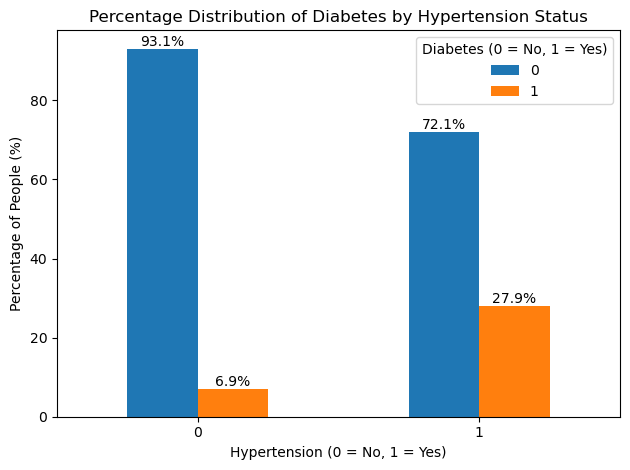

In [ ]:
table = pd.crosstab(df["hypertension"], df["diabetes"])
print(table)

percentage_table = table.div(table.sum(axis=1), axis=0) * 100

 
ax = percentage_table.plot(kind='bar')

plt.xlabel("Hypertension (0 = No, 1 = Yes)")
plt.ylabel("Percentage of People (%)")
plt.title("Percentage Distribution of Diabetes by Hypertension Status")
plt.legend(title="Diabetes (0 = No, 1 = Yes)")
plt.xticks(rotation=0)

 
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%')

plt.tight_layout()
plt.show()


From the analysis, it is visible that among individuals without hypertension, only 6.9% have diabetes. In contrast, 27.9% of individuals with hypertension are diabetic. This indicates that the prevalence of diabetes is considerably higher in hypertensive individuals, suggesting a strong association between hypertension and diabetes.

diabetes           0     1
heart_disease             
0              88825  7233
1               2675  1267


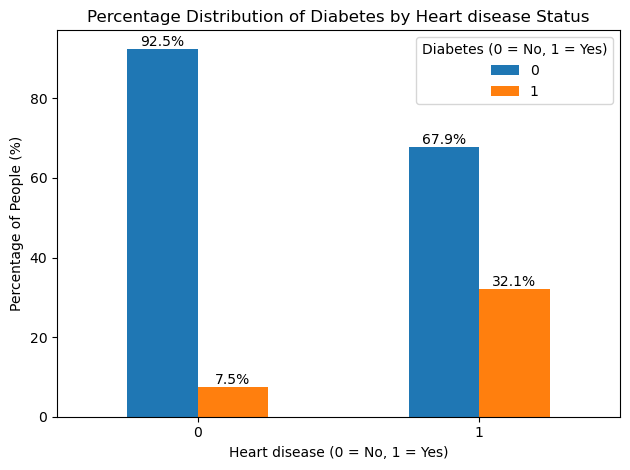

In [ ]:
table = pd.crosstab(df["heart_disease"], df["diabetes"])
print(table)

percentage_table = table.div(table.sum(axis=1), axis=0) * 100


ax = percentage_table.plot(kind='bar')

plt.xlabel("Heart disease (0 = No, 1 = Yes)")
plt.ylabel("Percentage of People (%)")
plt.title("Percentage Distribution of Diabetes by Heart disease Status")
plt.legend(title="Diabetes (0 = No, 1 = Yes)")
plt.xticks(rotation=0)


for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%')

plt.tight_layout()
plt.show()

From the analysis, it is evident that among individuals without heart disease, only 7.5% have diabetes. In contrast, 32.1% of individuals with heart disease are diabetic. This substantial difference indicates that the prevalence of diabetes is considerably higher among individuals with heart disease, suggesting a strong association between heart disease and diabetes.

In [8]:
df["smoking_history"].value_counts()

smoking_history
No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: count, dtype: int64

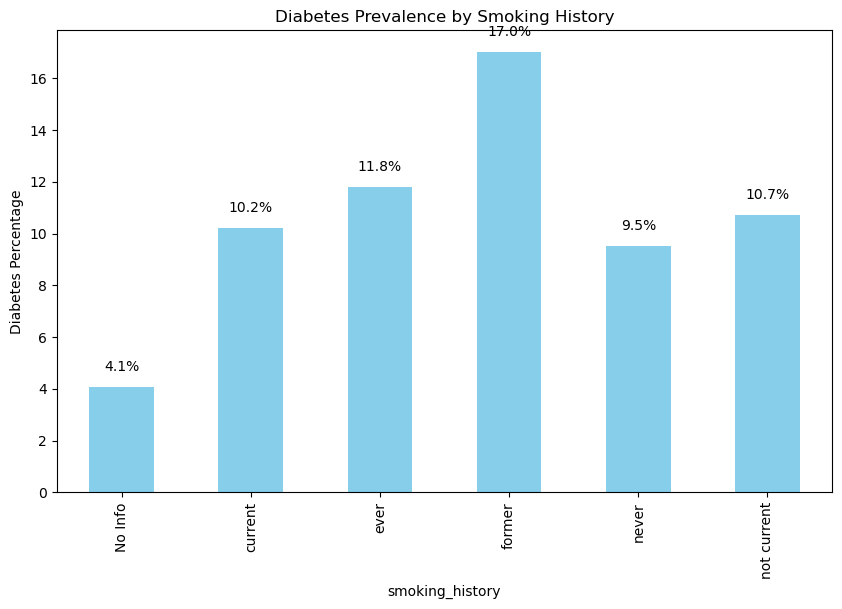

In [ ]:
 
result = df.groupby('smoking_history')['diabetes'].agg(
    total='count',
    diabetic='sum'
)

result['percentage'] = (result['diabetic'] / result['total']) * 100
plt.figure(figsize=(10, 6))
  
ax = result['percentage'].plot(kind='bar', color='skyblue')
plt.ylabel("Diabetes Percentage")
plt.title("Diabetes Prevalence by Smoking History")
for i, val in enumerate(result['percentage']):
    ax.text(i, val + 0.5, f"{val:.1f}%", ha='center', va='bottom')

plt.show()


This result shows that former smokers have the highest likelihood of having diabetes. The current and not-current smokers have almost the same diabetes prevalence. People with any history of smoking (“ever”) have 11.8% diabetes, while those who never smoked still have 9.5%. This indicates that, although smoking may slightly increase diabetes risk, it does not have as strong an effect as factors like heart disease or hypertension.

               hypertension  heart_disease       age
hypertension       1.000000       0.121262  0.251171
heart_disease      0.121262       1.000000  0.233354
age                0.251171       0.233354  1.000000


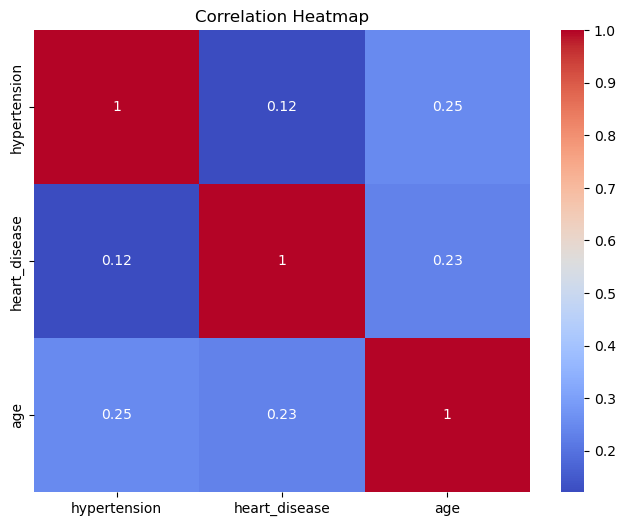

In [2]:
c=["hypertension","heart_disease","age"]
print(df[c].corr())
plt.figure(figsize=(8,6))
sns.heatmap(df[c].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

###  Effect of HbA1c, BMI and Glucose

In [11]:
x=df[["HbA1c_level","bmi","blood_glucose_level"]]
print(x.var())

HbA1c_level               1.146339
bmi                      44.046894
blood_glucose_level    1657.152341
dtype: float64


In [13]:
bmi_for_non_diabetes= df[df["diabetes"]==0]["bmi"].mean()
bmi_for_diabetes= df[df["diabetes"]==1]["bmi"].mean()

print("Average BMI with diabetes",bmi_for_diabetes)
print("Average BMI with no diabetes",bmi_for_non_diabetes)

Average BMI with diabetes 31.988382352941176
Average BMI with no diabetes 26.88716349726776


In [15]:
glucose_for_non_diabetes= df[df["diabetes"]==0]["blood_glucose_level"].mean()
glucose_for_diabetes= df[df["diabetes"]==1]["blood_glucose_level"].mean()

print("Average glucose with diabetes",glucose_for_diabetes)
print("Average glucose with no diabetes",glucose_for_non_diabetes)

Average glucose with diabetes 194.09470588235294
Average glucose with no diabetes 132.85246994535518


In [16]:
HbA1c_for_non_diabetes= df[df["diabetes"]==0]["HbA1c_level"].mean()
HbA1c_for_diabetes= df[df["diabetes"]==1]["HbA1c_level"].mean()

print("Average HbA1c with diabetes",HbA1c_for_diabetes)
print("Average HbA1c with no diabetes",HbA1c_for_non_diabetes)

Average HbA1c with diabetes 6.93495294117647
Average HbA1c with no diabetes 5.3967606557377055


These analysis show that the BMI, Glucose level, HbA1c are comparatively higher among people with diabetes.

                     HbA1c_level  blood_glucose_level       bmi
HbA1c_level             1.000000             0.166733  0.082997
blood_glucose_level     0.166733             1.000000  0.091261
bmi                     0.082997             0.091261  1.000000


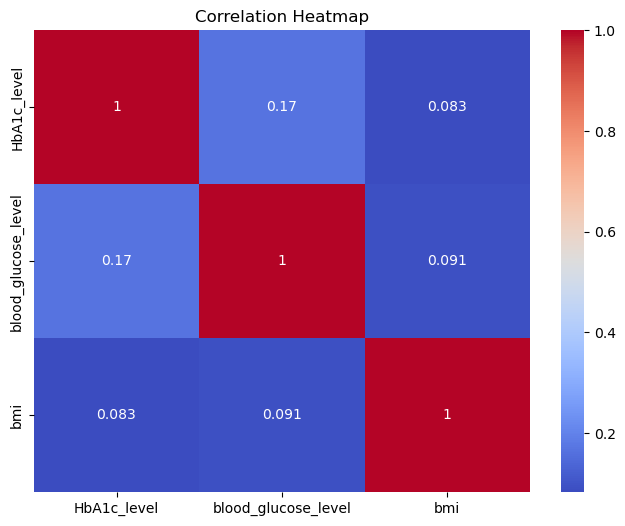

In [19]:
c=["HbA1c_level","blood_glucose_level","bmi"]
print(df[c].corr())
plt.figure(figsize=(8,6))
sns.heatmap(df[c].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()